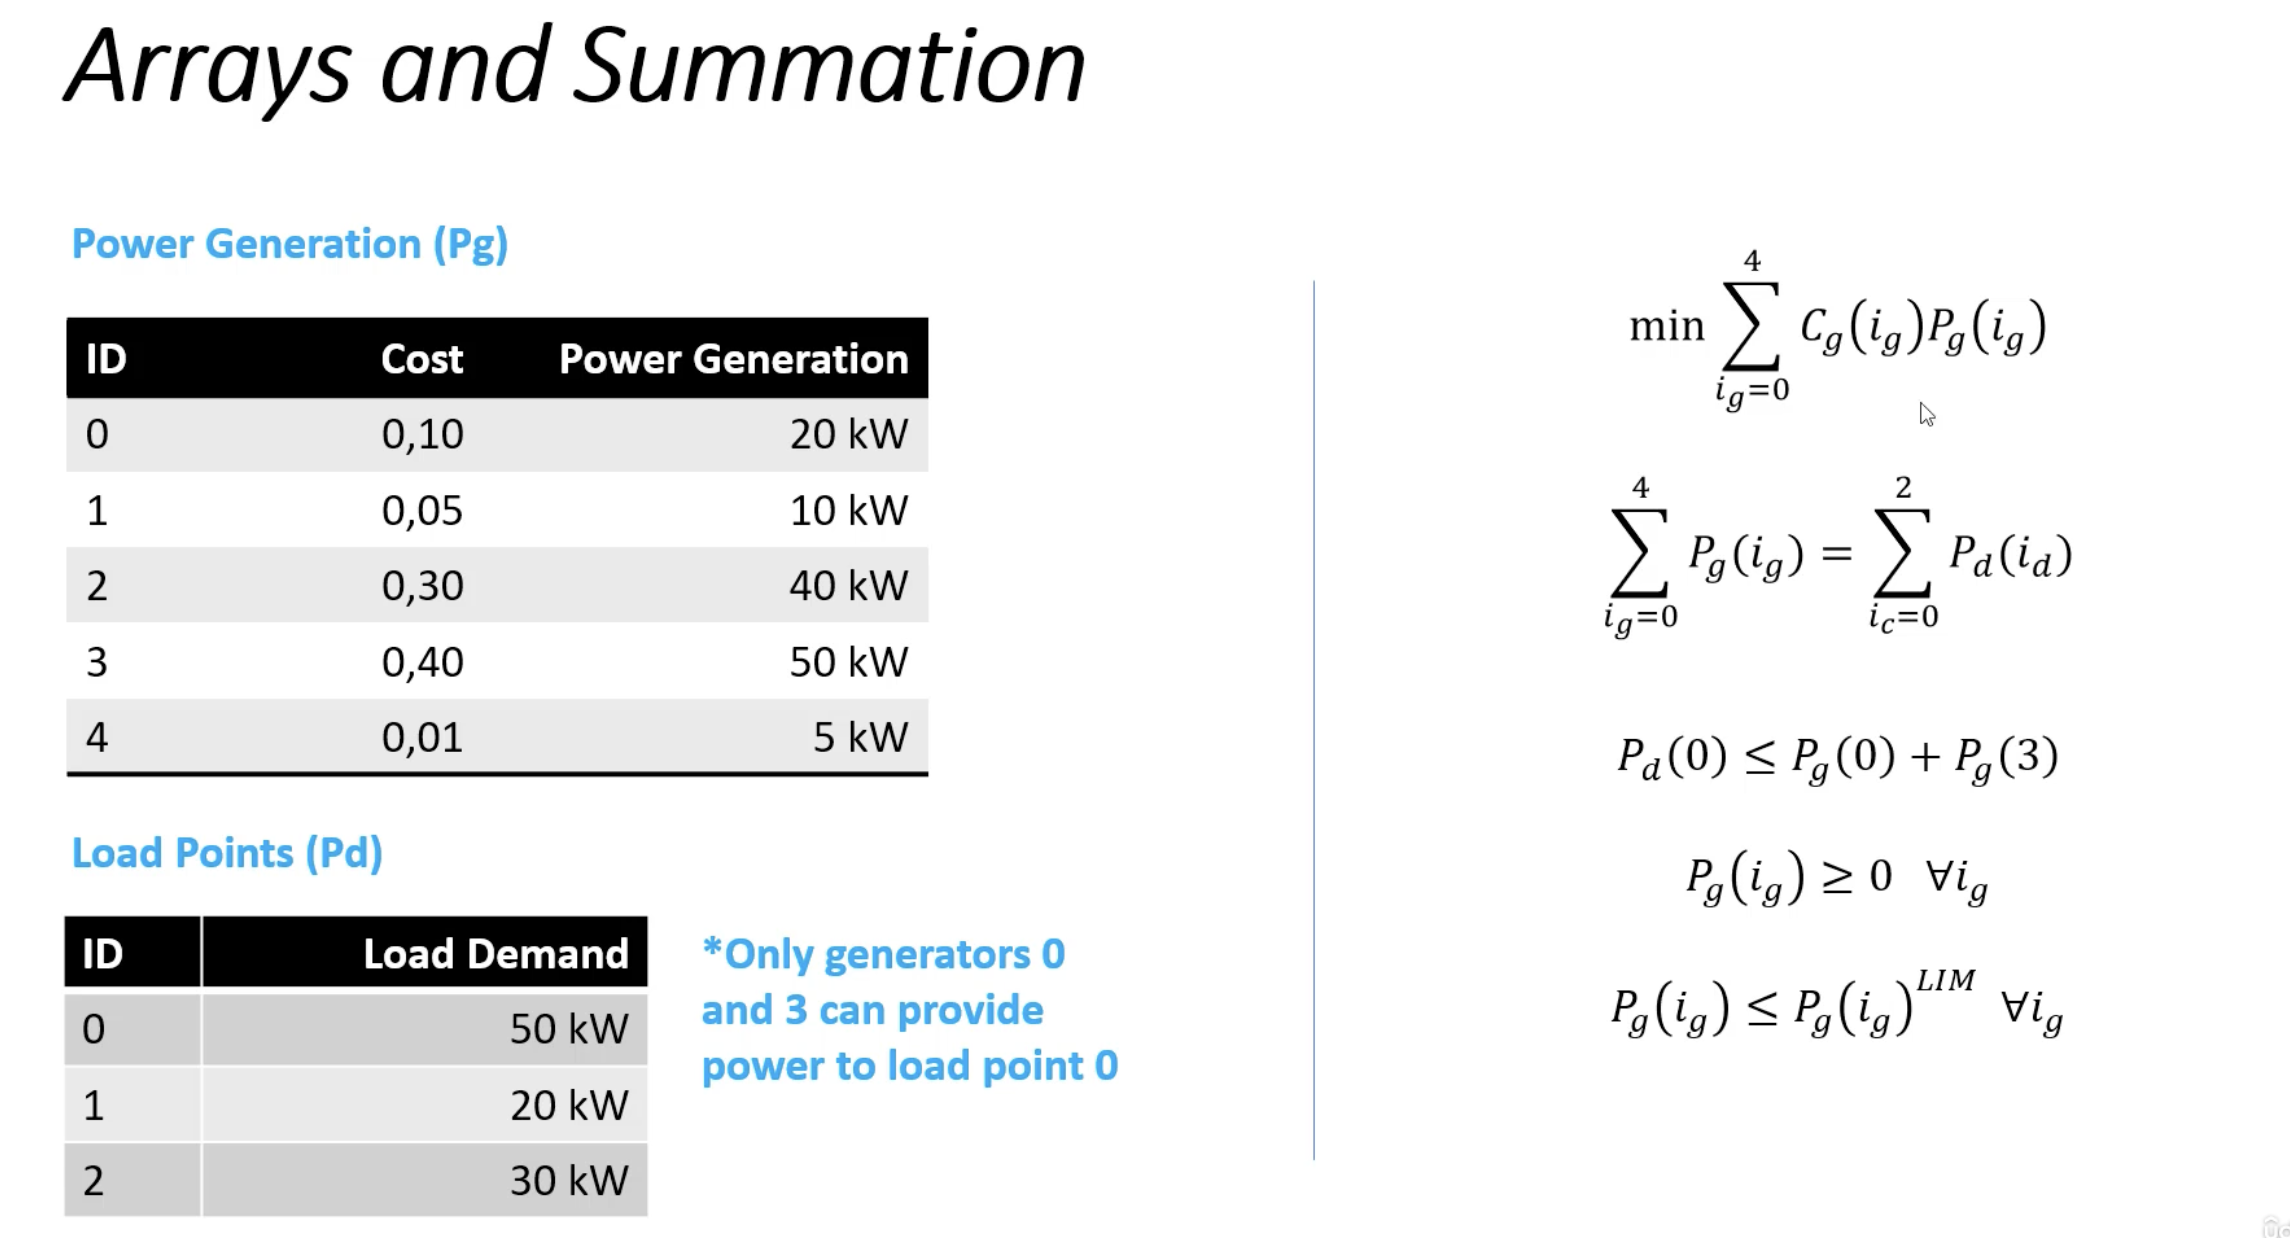

## Import the pyomo package and read data

In [1]:
# Import the pyomo package
import pyomo.environ as pyo
from pyomo.environ import *
from pyomo.opt import SolverFactory
import pandas as pd

# Read data
# dataGen = information about cost & power generation
# dataLoad = info about load demand
dataGen = pd.read_excel('/Users/jamin/Desktop/Learning/Operations Research/Udemy Course/Optimization with Python - Solve Operations Research Problems/06 - Working with Pyomo/inputs.xlsx', sheet_name='gen')
dataLoad = pd.read_excel('/Users/jamin/Desktop/Learning/Operations Research/Udemy Course/Optimization with Python - Solve Operations Research Problems/06 - Working with Pyomo/inputs.xlsx', sheet_name='load')


In [2]:
dataGen

,id,limit,cost
0,0,20,0.10
1,1,10,0.05
2,2,40,0.30
3,3,50,0.40
4,4,5,0.01


In [3]:
dataLoad

,id,value
0,0,50
1,1,20
2,2,30


In [4]:
for i in dataGen.id:
    print (dataGen.cost[i])

0.1
0.05
0.3
0.4
0.01


In [5]:
# Use the length of "dataGen" as the number of loop run times for the following summation
Ng = len(dataGen)
print(Ng)

5


In [6]:
#Create an optimization model (concrete model)
model = pyo.ConcreteModel()

#Creating five variables using the Ng number above. (Pg[1], Pg[2], Pg[3], Pg[3], Pg[4], Pg[5]) or Pg[i] for i in 1~5
model.Pg = pyo.Var(range(Ng), bounds=(0, None))
Pg = model.Pg

In [7]:
#Create variables for summation. Pg[i] means power generation
pg_sum = sum([Pg[i] for i in dataGen.id])
print(pg_sum)

Pg[0] + Pg[1] + Pg[2] + Pg[3] + Pg[4]


In [8]:
# Create an equality: pyo.Constraint( expr = sum() == sum() )
model.balance = pyo.Constraint(expr = pg_sum == sum(dataLoad.value))

In [9]:
# Create the first constraint: Pd(0) <= Pg(0) + Pg(3)
model.cond = pyo.Constraint(expr = Pg[0]+Pg[3] >= dataLoad.value[0])

In [10]:
# Create the wsecond constraint: Pg[i] >= 0
model.limits = pyo.ConstraintList()
for g in dataGen.id:
    model.limits.add(expr = Pg[g] <= dataGen.limit[g])

In [11]:
model.Pg.pprint()
print("\n")
model.cond.pprint()
print("\n")
model.limits.pprint()
print("\n")
model.balance.pprint()

Pg : Size=5, Index=Pg_index
    Key : Lower : Value : Upper : Fixed : Stale : Domain
      0 :     0 :  None :  None : False :  True :  Reals
      1 :     0 :  None :  None : False :  True :  Reals
      2 :     0 :  None :  None : False :  True :  Reals
      3 :     0 :  None :  None : False :  True :  Reals
      4 :     0 :  None :  None : False :  True :  Reals


cond : Size=1, Index=None, Active=True
    Key  : Lower : Body          : Upper : Active
    None :  50.0 : Pg[0] + Pg[3] :  +Inf :   True


limits : Size=5, Index=limits_index, Active=True
    Key : Lower : Body  : Upper : Active
      1 :  -Inf : Pg[0] :  20.0 :   True
      2 :  -Inf : Pg[1] :  10.0 :   True
      3 :  -Inf : Pg[2] :  40.0 :   True
      4 :  -Inf : Pg[3] :  50.0 :   True
      5 :  -Inf : Pg[4] :   5.0 :   True


balance : Size=1, Index=None, Active=True
    Key  : Lower : Body                                  : Upper : Active
    None : 100.0 : Pg[0] + Pg[1] + Pg[2] + Pg[3] + Pg[4] : 100.0 :   True


In [12]:
# Create an objective function: model.obj = pyo.Objective(expr = cost_sum, sense = minimize)
cost_sum = sum([Pg[g]*dataGen.cost[g] for g in dataGen.id])
model.obj = pyo.Objective(expr = cost_sum, sense = minimize)

opt = SolverFactory('cbc')
results = opt.solve(model)


In [13]:
cost_sum = 0
for g in dataGen.id:
    print(f"The value of {Pg[g]} = {pyo.value(Pg[g])}")
    cost_sum += dataGen.cost[g]*pyo.value(Pg[g])  
print(f"The minimum sum of cost is {cost_sum}")

The value of Pg[0] = 20.0
The value of Pg[1] = 10.0
The value of Pg[2] = 35.0
The value of Pg[3] = 30.0
The value of Pg[4] = 5.0
The minimum sum of cost is 25.05
